#  F Data Science - Tech Interview: Credit EDA

### June 2020

<hr style="height:2pt">

## Description

The following dataset has 150.000 records of borrowers taken from an anonymous bank, which are described through 12 different columns.

The goal of this test is to perform an Exploratory Data Analysis (EDA) on this dataset, to understand the information contained and obtain insights that could be relevant to solve a business problem.

You can find the data in this [link](https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/CreditEDA/data/credit-data.csv)

Below is a description of the involved columns:

| Variable Name | Description | 
| ------------- | ----------- |
| unnamed:0 | ID of borrower |
| serious_dlqin2yrs | Person experienced 90 days past due delinquency or worse |
| revolving_utilization_of_unsecured_lines | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits |
| age | Age of borrower in years | 
| number_of_time30-59_days_past_due_not_worse | Number of times borrower has been 30-59 days past due but no worse in the last 2 years |
| debt_ratio | Monthly debt payments, alimony, living costs divided by monthy gross income |
| monthly_income | Monthly income |
| number_of_open_credit_lines_and_loans | Number of open loans (installment like car loan or mortgage) and lines of credit (e.g. credit cards) |
| number_of_times90_days_late | Number of times borrower has been 90 days or more past due |
| number_real_estate_loans_or_lines | Number of mortgage and real estate loans including home equity lines of credit |
| number_of_time60-89_days_past_due_not_worse | Number of times borrower has been 60-89 days past due but no worse in the last 2 years |
| number_of_dependents | Number of dependents in family excluding themselves (spouse, children etc.) |


Please **read carefully** all the assignments to guide the work that is expected to find in this notebook.

## Assignments

In this notebook you have to load all the libraries you need to explore and process the given dataset, and then perform the analysis to extract meaningful facts in order to understand the information involved. You are free to make any kind of analytic you want, but at the end it is expected to have done the "mandatory" tasks on this work. In addition, there are some "desirable" aspects that would enrich the work done, and some "bonus" tasks as well to obtain an oustanding valoration in this interview.

**NOTE: provide reports in English.**

### Mandatory

- **Stack of technologies:** The analysis on this notebook should be done by using at least the following stack:   
    - Python 3.x (not 2.x)
    - Pandas 1.0.x
    - Numpy 1.18.x
    - Matplotlib 3.2.x
- **Data QA:** You must check the quality of the given dataset to make an assessment of how appropriate it is for later Data Science tasks. Propose a set of corrective actions over the data.     
- **Report insights and conclusions:** Describe the results obtained during the exploratory analysis and provide conclusions from a business perspective, supported by charts / tables / metrics.    
- **Feature extraction:** Indicate some possible candidates of features that could properly describe the borrowers, either from the given columns or from their transformations.
- **Machine Learning approaches:** Describe the possible Machine Learning tasks that could be performed from the given data, which may be valuable in the context of the finance domain (just explain with words, **don't fit a model**).

### Desirable aspects

- **Code versioning with Git** (you are free to publish it on your own Github/Bitbucket account!).
- **Use all possible programming paradigms in Python** (e.g. imperative, OOP, functional, etc).
- **Docstring** on classes and functions developed.
- **Describe the data treatment** that could be done to perform the tasks of modeling and make predictions from data in this format (just with words, giving details of each step involved).
- **Use cases:** Describe possible use cases for this dataset that could add value to the given business, indicating methods / techniques and algorithms for each of them and justifying the choice made.

### Bonus

- Machine Learning approaches: at least one fitted model with the given data.
- Propose new attributes that could improve the business understanding as well as the possible approaches to follow.

Once you complete the assessment, please send a ZIP file of the folder with all the resources used in this work (e.g. Jupyter notebook, Python scripts, text files, images, etc) to leandro.ferrado@fligoo.com. Then you are going to have a final meeting with the team to discuss the work done in this notebook and answer the questions that could arise.

**Have fun!**

![Have fun](https://media1.tenor.com/images/8d13f337a8c6e5aab8ba1bd8acd4da0c/tenor.gif?itemid=5304821)

# SOLUTION PROPOSED

## Set-up

In [ ]:
#!pip install git+https://github.com/tensorflow/docs  # already in req's file...

In [ ]:
# If not running on  docker
#!pip install -r requirements.txt

In [1]:
# Packages list
# !pip  list

Package                Version                                       
---------------------- ----------------------------------------------
absl-py                0.9.0                                         
astor                  0.8.1                                         
astunparse             1.6.3                                         
attrs                  19.3.0                                        
backcall               0.2.0                                         
bleach                 3.1.5                                         
cachetools             4.1.0                                         
certifi                2020.4.5.1                                    
chardet                3.0.4                                         
colorama               0.4.3                                         
cycler                 0.10.0                                        
decorator              4.4.2                                         
defusedxml          

In [2]:
# Get current conda environment
#import os
#print(os.environ['CONDA_DEFAULT_ENV'])

fligoo


In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

import warnings
warnings.filterwarnings('ignore')
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
%matplotlib inline

## Data Exploration & QA

 #### Load file

In [6]:
#bor_raw = pd.read_csv("https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/CreditEDA/data/credit-data.csv") # dwonlaod from source if not local
bor_raw = pd.read_csv("./../data/credit-data.csv")

In [3]:
bor_raw.shape

(150000, 12)

In [6]:
bor_raw.head()

,unnamed: 0,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
bor_raw.tail()

,unnamed: 0,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


First remove row number column and check if there exists duplicated rows

In [8]:
bor_no_row_number = bor_raw.drop('unnamed: 0', axis=1)

bor_no_row_number.duplicated().sum()

767

Remove duplicated rows

In [9]:
bor_no_dup = bor_no_row_number.drop_duplicates()

Lets check data types for the dataframe

In [10]:
bor_no_dup.dtypes

serious_dlqin2yrs                                int64
revolving_utilization_of_unsecured_lines       float64
age                                              int64
number_of_time30-59_days_past_due_not_worse      int64
debt_ratio                                     float64
monthly_income                                 float64
number_of_open_credit_lines_and_loans            int64
number_of_times90_days_late                      int64
number_real_estate_loans_or_lines                int64
number_of_time60-89_days_past_due_not_worse      int64
number_of_dependents                           float64
dtype: object

Now we'll plot the distribution for each variable using boxplots

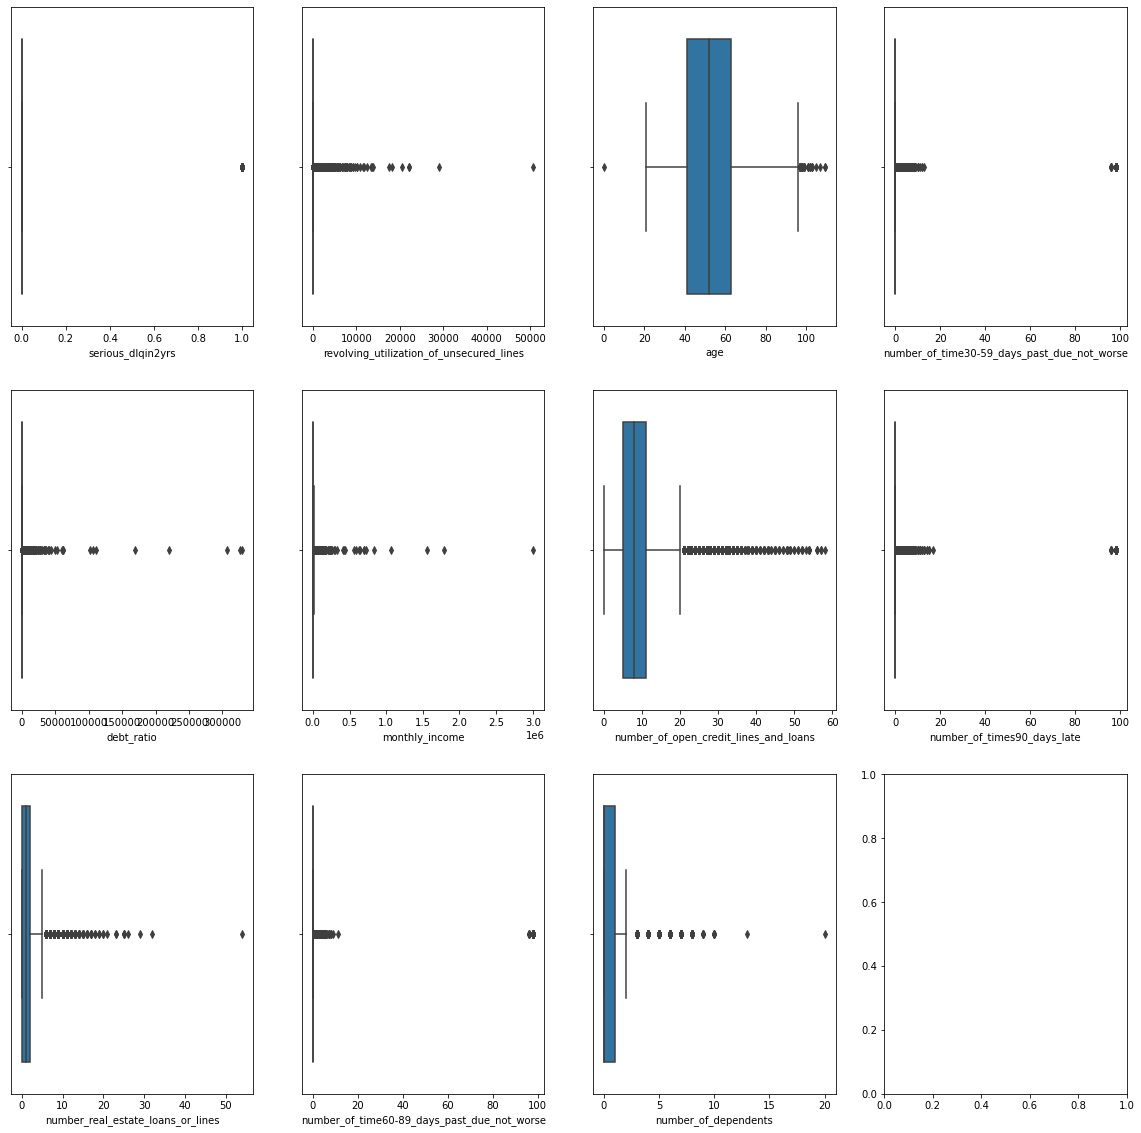

In [11]:
f, axes = plt.subplots(3,4, figsize=(20, 20), sharex=False)
for ax, feature in zip(axes.flat, bor_no_dup.columns):
    sns.boxplot(bor_no_dup[feature], ax=ax)

Let's plot the distribution for each variable using histograms

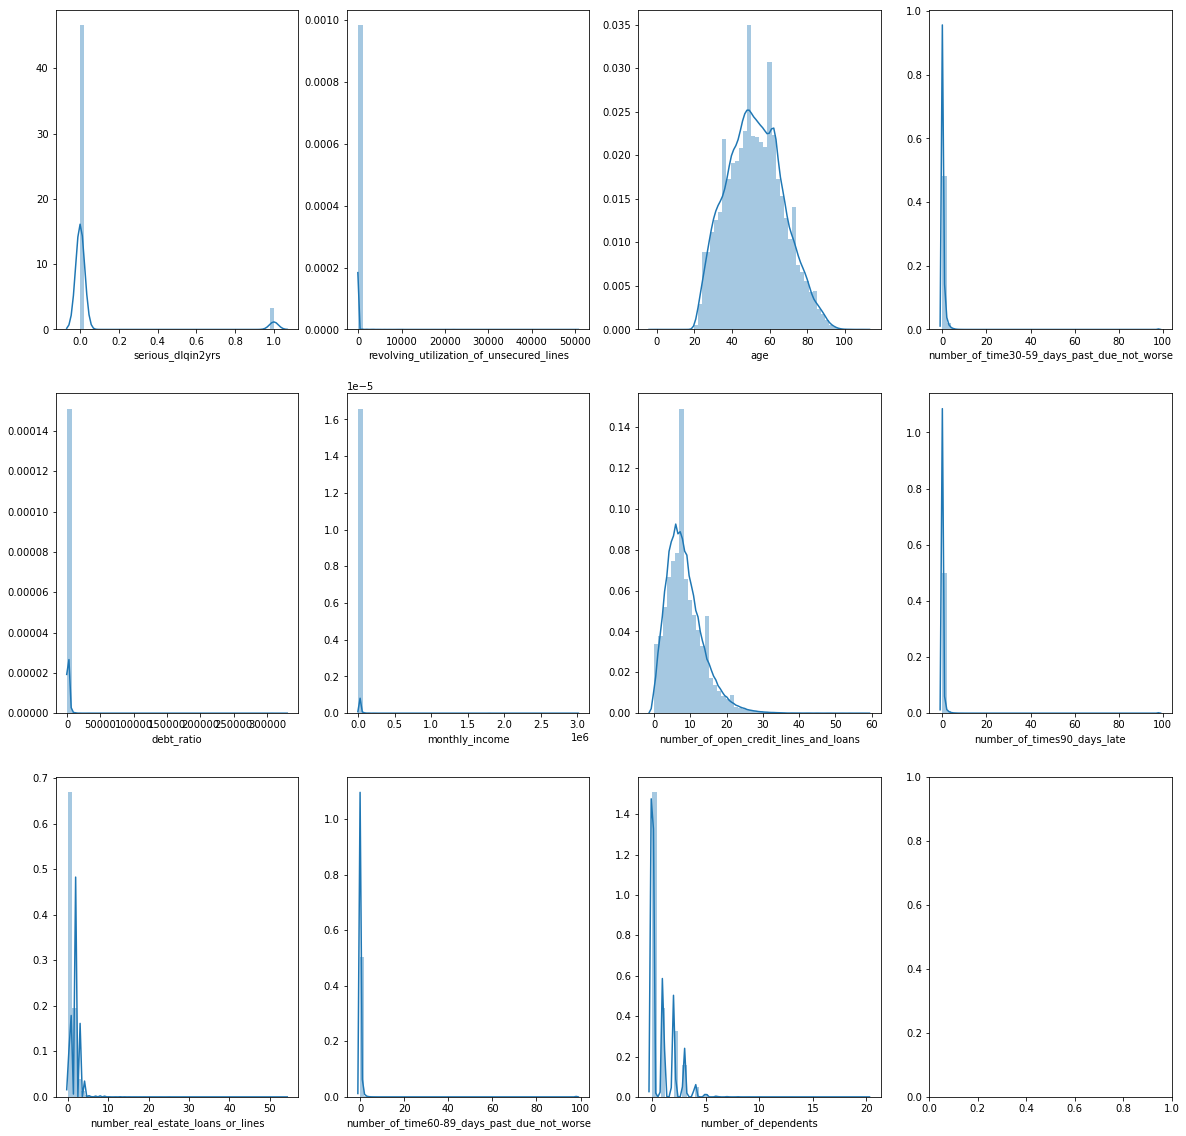

In [12]:
f, axes = plt.subplots(3,4, figsize=(20, 20), sharex=False)

for ax, feature in zip(axes.flat, bor_no_dup.columns):
    sns.distplot(bor_no_dup[feature], ax=ax, norm_hist=True)

We'll plot again variable **age** fitting a normal curve on it to check how closer it gets to that distribution

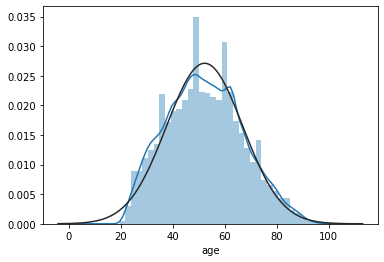

<Figure size 432x288 with 0 Axes>

In [13]:
sns.distplot(bor_no_dup['age'], fit=norm)

fig = plt.figure()

Let's do the same fitting for **number_of_open_credit_lines_and_loans**

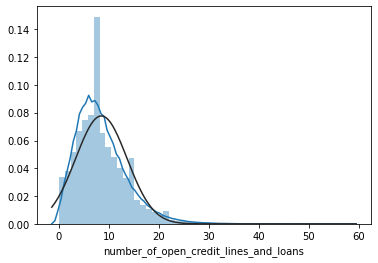

<Figure size 432x288 with 0 Axes>

In [14]:
sns.distplot(bor_no_dup['number_of_open_credit_lines_and_loans'], fit=norm)

fig = plt.figure()

Now let's check correlations between  all variable

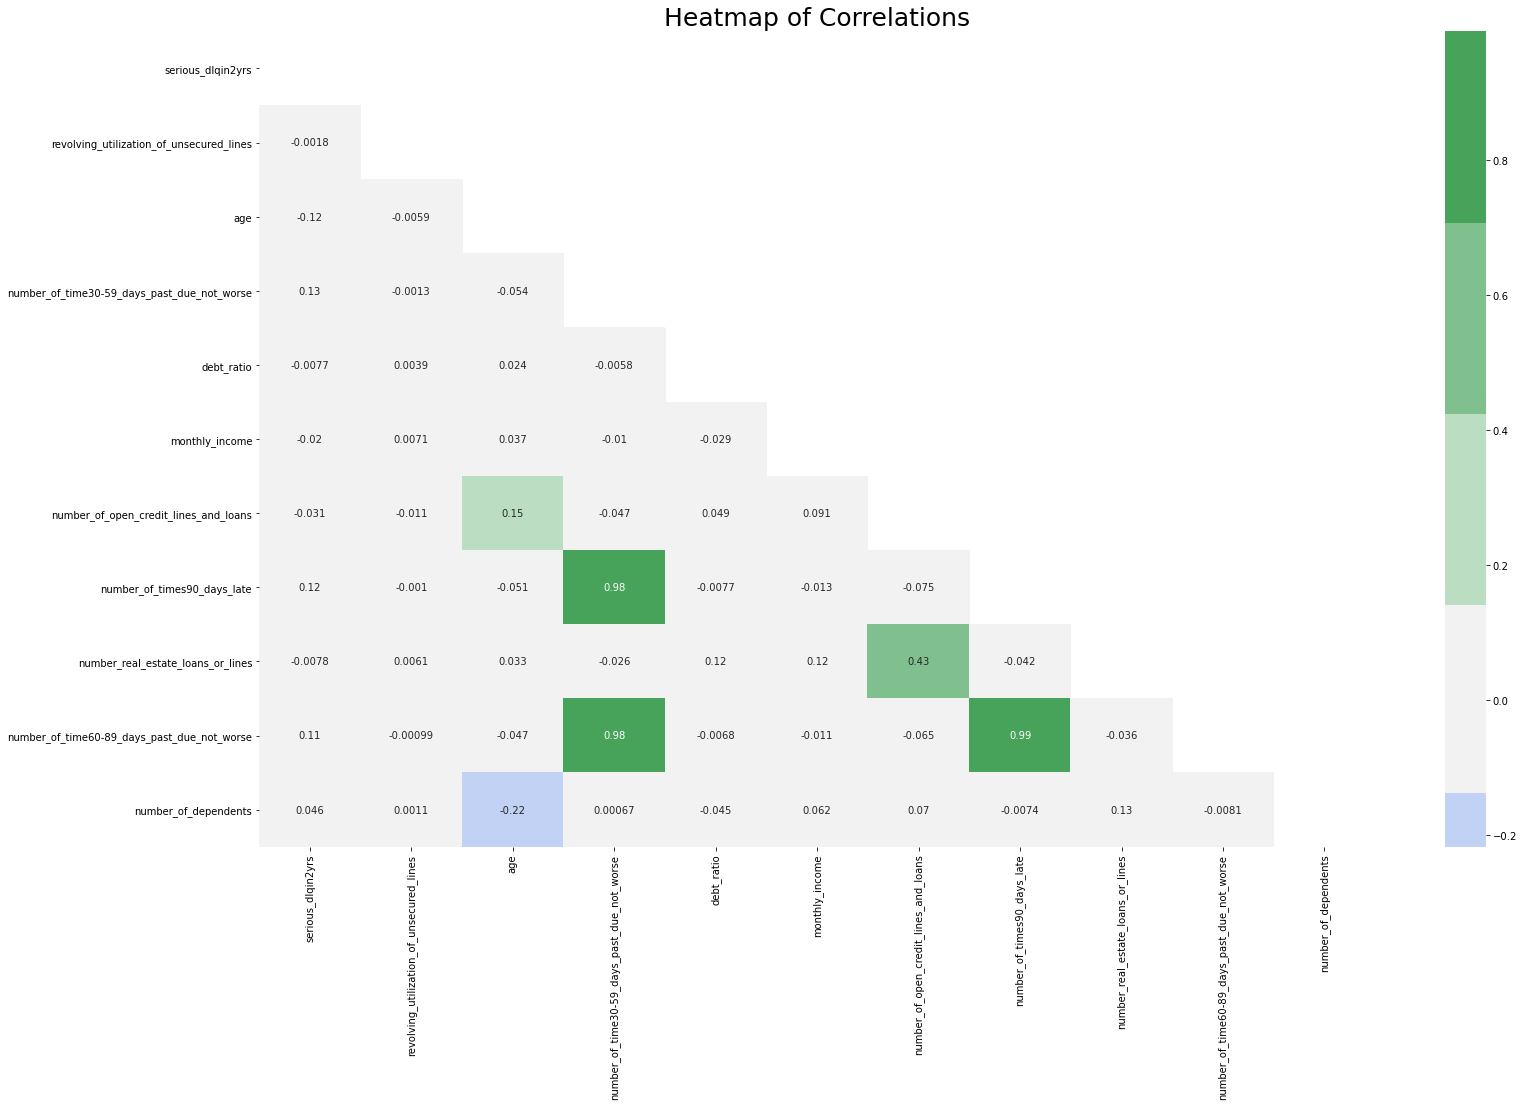

In [15]:
# Generate a mask for the upper triangle 
mask = np.zeros_like(bor_no_dup.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (25,15))
sns.heatmap(bor_no_dup.corr(), 
            cmap=sns.diverging_palette(255, 133, l=60, n=7), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
plt.title("Heatmap of Correlations", fontsize = 25);

* Variables **number_timer_*** variables are highly correlated, this gives us a hint regarding the creation of a new feature based on these three
* **Age** and **number_of_dependents** is expected to be  negative correlated (-.22)
* **loans_and_lines** features are also correlated (.43) maybe because both of theme include lines of open credits

Now let's describe the data frame

In [16]:
bor_no_dup.describe()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,149233.000000,149233.000000,149233.000000,149233.000000,149233.000000,1.201700e+05,149233.000000,149233.000000,149233.000000,149233.000000,149233.000000
mean,0.067036,6.077045,52.298145,0.388386,354.808254,6.675098e+03,8.488082,0.232435,1.023473,0.206811,0.741177
std,0.250085,250.396053,14.714050,3.779712,2042.891693,1.438958e+04,5.134233,3.752133,1.130304,3.736132,1.108596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030210,41.000000,0.000000,0.178098,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154285,52.000000,0.000000,0.368578,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.555959,63.000000,0.000000,0.877090,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Variable **serious_dlqin2yrs** seems to be binary, so let's compute values and percetages

In [17]:
bor_no_dup['serious_dlqin2yrs'].value_counts(normalize=True)

0    0.932964
1    0.067036
Name: serious_dlqin2yrs, dtype: float64

Now we'll check NA's for all the variables in the data frame

In [18]:
bor_no_dup.isnull().sum()

serious_dlqin2yrs                                  0
revolving_utilization_of_unsecured_lines           0
age                                                0
number_of_time30-59_days_past_due_not_worse        0
debt_ratio                                         0
monthly_income                                 29063
number_of_open_credit_lines_and_loans              0
number_of_times90_days_late                        0
number_real_estate_loans_or_lines                  0
number_of_time60-89_days_past_due_not_worse        0
number_of_dependents                               0
dtype: int64

The only variable that has NA's is **monthly_income**

## Summary
- **serious_dlqin2yrs:** Binary attribute where around 92% of values are 0   
- **revolving_utilization_of_unsecured_lines:** 75% of the values are below 0.6, high standard deviation tells us that the dispersion is high and there is also an extreme value close to 50000
- **age :** The variable behaves similar to a normal distribution where the mean and median are  around 52 years
- **number_of_time30-59_days_past_due_not_worse :** at least 75% of values are 0 and a couple of outliers near to 98   !!!
- **debt_ratio :** We expect to have values between 0 and 1, most of the are (75% below 0.8), so we must check further   !!!!
- **monthly_income :** Around 30% of the values are missing (29000/150000)     !!!!!!
- **number_of_open_credit_lines_and_loans :** Nearly normal with positive skeweness
- **number_of_times90_days_late :** at least 75% of values are 0 and a couple of outliers near to 98 
- **number_real_estate_loans_or_lines :**  It shows some of outliers but the stard deviation is low and mean and median are similar
- **number_of_time60-89_days_past_due_not_worse :** at least 75% of values are 0 and a couple of outliers near to 98 
- **number_of_dependents :** It shows some of outliers but the stard deviation is low and mean and median are similar

So from now on we'll be working deeper on **number_of_times_***, **debt_ratio** and **monthly_income**

## Variables  **number_of_times_***

Variables **number_of_time30-59_days_past_due_not_worse** , **number_of_times90_days_late** and **number_of_time60-89_days_past_due_not_worse**
show very extreme values greater than 90,  let's plot:

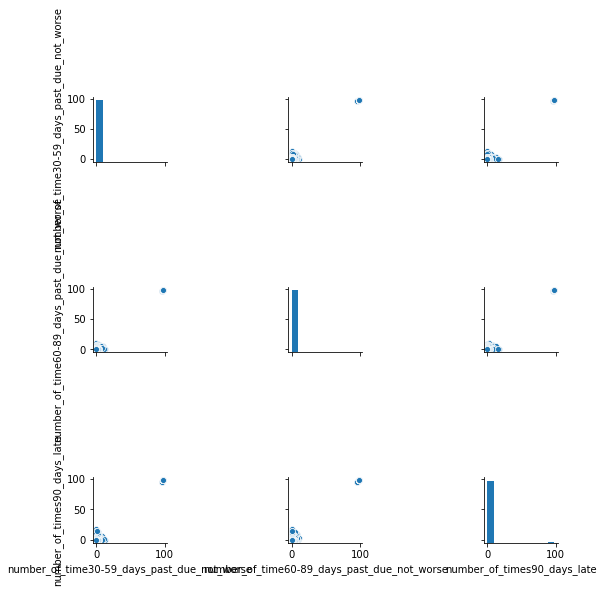

In [19]:
sns.pairplot(bor_no_dup[['number_of_time30-59_days_past_due_not_worse','number_of_time60-89_days_past_due_not_worse','number_of_times90_days_late']])

Visualization suggests us that there are some isolated values around 100 so we'll count those greater than 90 for all the  **number_of_times_*** variables:

In [20]:
threshold = 90

n_due_30 = bor_no_dup[bor_no_dup['number_of_time30-59_days_past_due_not_worse'] > threshold]['number_of_time30-59_days_past_due_not_worse'].count() 
n_due_60 = bor_no_dup[bor_no_dup['number_of_time60-89_days_past_due_not_worse'] > threshold]['number_of_time60-89_days_past_due_not_worse'].count() 
n_due_90 = bor_no_dup[bor_no_dup['number_of_times90_days_late'] > threshold]['number_of_times90_days_late'].count() 

print(n_due_30, n_due_60, n_due_90)

216 216 216


So now we know the three variables have the same amount (216) of values greater than 90. In order to be sure that those values are in the same row, 
we'll get a pandas series of booleans, then create a list and compare them:

In [21]:
list_30 = list(bor_no_dup.loc[: , 'number_of_time30-59_days_past_due_not_worse'] > threshold)
list_60 = list(bor_no_dup.loc[: , 'number_of_time60-89_days_past_due_not_worse'] > threshold)
list_90 = list(bor_no_dup.loc[: , 'number_of_times90_days_late'] > threshold)

list_30 == list_60 == list_90   

True

Now we're sure the extreme values are in the same position, so removing them will only decrease the dataframe on 216, a very low percentage of the total:

In [27]:
bor_no_due_outlier = bor_no_dup.loc[bor_no_dup['number_of_time30-59_days_past_due_not_worse'] < threshold ]

Our new data frame is  **bor_no_due_outlier**

## Variable **debt_ratio**

**WE EXPECT** a ratio to be between 0 and 1. **WE ASSUME** that cases where debts are greater than incomes make totaly sense  , so let's check debt_ratio greater than 1

In [28]:
df_ration_greater_1 = bor_no_due_outlier[bor_no_due_outlier['debt_ratio'] > 1]

df_ration_greater_1['debt_ratio'].count()

35099

Almost 23% (35099/150000) of values for deb_rate are grater than 1, we can't drop that amount of values so let's see how values behave for this subset

In [29]:
df_ration_greater_1['debt_ratio'].describe()

count     35099.000000
mean       1507.529513
std        4000.914444
min           1.000500
25%          42.581683
50%         910.000000
75%        2211.000000
max      329664.000000
Name: debt_ratio, dtype: float64

Bearing in mind that 75% of values of the are below 0.86 and based on the quartiles distribution printed above for values greater than 1, 
we'll discretize them as ordinal variables with the following criterion:
* 1 = 0 ratio
* 2 = (0 - 0.5] 
* 3 = (0.5 - 1]
* 4 = (1 - 43]
* 5 = (43 - 907]
* 6 = (907 , 999999]))

**We assume that risk increases as debt category increases...**

In [30]:
cut_labels = list(range(1,7))

cut_bins = [-1, 0, 0.5, 1 , 43, 907, 999999]

bor_no_due_outlier['debt_label'] = pd.cut(bor_no_due_outlier['debt_ratio'], bins=cut_bins, labels=cut_labels)

bor_no_due_outlier['debt_label'].value_counts(sort=False)

1     3206
2    89563
3    21149
4     8835
5     8698
6    17566
Name: debt_label, dtype: int64

**debt_ratio** is no longer needed, we'll drop it

In [31]:
bor_no_due_outlier.drop('debt_ratio', inplace=True, axis = 1)

## Variable **monthly_income**

In [32]:
print("Total of missing values:", bor_no_due_outlier.monthly_income.isnull().sum())

Total of missing values: 28992


In [33]:
print("Description ", bor_no_due_outlier.monthly_income.describe())

Description  count    1.200250e+05
mean     6.680009e+03
std      1.439726e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.250000e+03
max      3.008750e+06
Name: monthly_income, dtype: float64


First we'll create subsets for data with and without NA's

In [34]:
mi_no_na = bor_no_due_outlier[bor_no_due_outlier.monthly_income.notnull()]

mi_na  = bor_no_due_outlier[bor_no_due_outlier.monthly_income.isnull()]

 We will work with the subset that has no NA's to asses some technique to impute values.
 **X** will contain the features and **y** the target.

In [36]:
features, target = mi_no_na.loc[:, mi_no_na.columns != 'monthly_income'], mi_no_na.monthly_income 

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target, 
                                                    test_size=0.1,
                                                    random_state=42)
print("Filas del dataset original:",features.shape[0])
print("Filas del dataset de entrenamiento:",X_train.shape[0])
print("Filas del dataset de test:",X_test.shape[0])

Filas del dataset original: 120025
Filas del dataset de entrenamiento: 108022
Filas del dataset de test: 12003


Given that the target variable is  continuous we can use regression as a **base line**. We'll try out **ridge**  with different solvers:
* SVD 
* Least Squares
* Gradien based (SAG)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

We'll also evaluate Mean & median imputation and Neural-nets


We know beforehand that **monthly_income** has correlation around 0 with the rest of the variables, what makes the imputation task even harder !!!!! :(

**Ridge Regression**

Ridge regression with grid search for exhaustive search over specified parameter values for an estimator

In [181]:
np.random.seed(42) 
for idx, solver in enumerate(('svd','lsqr', 'sag'), start=1):
    exploring_params = {
        'normalize': ['True','False'],  
        'fit_intercept': ['True','False'],  
        'alpha': [ 0.1, 0.01, 0.001, 0.0001]  # Regularization term
                        }
    
    m = Ridge(solver=solver, tol=1e-3)
    model = GridSearchCV(m, exploring_params, cv=5, scoring='r2', n_jobs=-1) # cross validation spliting technique   
    model.fit(X_train, y_train)
    
    
    print("# Exploration of hyperparameters for solver function \"%s\"" % solver, end="\n\n")
    print("R2 value for training set: ",model.score(X_train, y_train), end="\n\n")
    
    print("Parameters best combination:", end="\n")
    print(model.best_params_, end="\n\n")

    print("Metrics for the best classifier (on evaluation set):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print("R2 value for testing: ", metrics.r2_score(y_true,y_pred), end="\n") 
    print("MSE value for testing: ", metrics.mean_squared_error(y_true,y_pred), end="\n")
    print("MAE value for testing: ", metrics.mean_absolute_error(y_true,y_pred), end="\n\n")
    print("================================================", end="\n\n")

# Exploration of hyperparameters for solver function "svd"

R2 value for training set:  0.05350512347609626

Parameters best combination:
{'alpha': 0.01, 'fit_intercept': 'True', 'normalize': 'True'}

Metrics for the best classifier (on evaluation set):

R2 value for testing:  0.010132417098072333
MSE value for testing:  796030684.40443
MAE value for testing:  3080.234498501256


# Exploration of hyperparameters for solver function "lsqr"

R2 value for training set:  0.05350287820153565

Parameters best combination:
{'alpha': 0.01, 'fit_intercept': 'True', 'normalize': 'True'}

Metrics for the best classifier (on evaluation set):

R2 value for testing:  0.010123361237091455
MSE value for testing:  796037966.9373051
MAE value for testing:  3080.216287128474


# Exploration of hyperparameters for solver function "sag"

R2 value for training set:  0.05350530481661986

Parameters best combination:
{'alpha': 0.01, 'fit_intercept': 'False', 'normalize': 'False'}

Metrics for the best classif

There's no significant difference between the approache, MAE is arounf 3080 for all of them...

**Mean & median**

In [39]:
mi_mean = y_train.mean()

mi_median = y_train.median()

Let's create a dataframe and compute the performance for both imputations techniques

In [183]:
mi_subset = pd.DataFrame({'y':y_test.T.squeeze(), 'mi_mean':mi_mean, 'mi_median':mi_median}) ##  DataFrames with a single column or a single row are squeezed to a Series

print("MSE for mean",metrics.mean_squared_error(mi_subset['y'],mi_subset['mi_mean']))
print("MAE for mean",metrics.mean_absolute_error(mi_subset['y'],mi_subset['mi_mean']),end="\n\n")
print("MSE for median:",metrics.mean_squared_error(mi_subset['y'],mi_subset['mi_median']))
print("MAE for median",metrics.mean_absolute_error(mi_subset['y'],mi_subset['mi_median']))

MSE for mean 804207469.326304
MAE for mean 3733.8706315202194

MSE for median: 806229493.4353079
MAE for median 3571.463634091477


Imputation of the median make the error decrease compared to a regression apporach...

**Neural Nets**

For NN we'll work with the complete dataframe

In [41]:
nn_features, nn_target = bor_no_due_outlier.loc[:, bor_no_due_outlier.columns != 'monthly_income'], bor_no_due_outlier.monthly_income 

Working with NN requires scaling values for features, let-s do that for the **entire** dataframe

In [42]:
standardScaler = StandardScaler()

nn_feat_scaled = pd.DataFrame(standardScaler.fit_transform(nn_features), 
                                columns=nn_features.columns,
                                index=nn_features.index)

Concatenate all data

In [43]:
nn_data = pd.concat([nn_feat_scaled, nn_target], axis=1,sort=False)

Separate rows with NA's, so we'll predict this missing values later on...

In [44]:
nn_data_no_na = nn_data[nn_data.monthly_income.notnull()]

nn_data_na  = nn_data[nn_data.monthly_income.isnull()]

In [45]:
nn_data_no_na.head(n=5)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,debt_label,monthly_income
0,3.75432,-0.021224,-0.497914,2.507069,0.877502,-0.186607,4.400954,-0.196863,1.134827,0.080332,9120.0
1,-0.26636,-0.020462,-0.837965,-0.353192,-0.877647,-0.186607,-0.906683,-0.196863,0.232982,-0.621933,2600.0
2,-0.26636,-0.021655,-0.973985,1.076938,-1.267681,1.868803,-0.906683,-0.196863,-0.668863,-0.621933,3042.0
3,-0.26636,-0.023349,-1.518066,-0.353192,-0.682631,-0.186607,-0.906683,-0.196863,-0.668863,-0.621933,3300.0
4,-0.26636,-0.020661,-0.225873,1.076938,-0.292598,-0.186607,-0.022077,-0.196863,-0.668863,-0.621933,63588.0


Let's work with the dataset without NA's and split test and train

In [46]:
X, y = nn_data_no_na.loc[:, nn_data_no_na.columns != 'monthly_income'], nn_data_no_na.monthly_income

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.1, 
                                                    random_state=42)                                                 

We'll create a simple sequential model with 1 hidden layer and droput regularization, ELU as activation funtion , our optimizer will be Adam with a learnin rate of 10E-4 and cost function MSE.

In [47]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(32, activation='elu', input_shape=[len(X_train.keys())]),
        layers.Dropout(0.2),
        layers.Dense(64, activation='elu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.0001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

Instantiate the model and  plot the architecture

In [48]:
model_elu_64 = build_model()

model_elu_64.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,529
Trainable params: 2,529
Non-trainable params: 0
_________________________________________________________________


We'll train he NN for 20 epochs, telling the fitter to stop if validation loss doesn't get better after 5 epochs !!!!

In [49]:
n_epochs = 20

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

training_hist= model_elu_64.fit(X_train, 
                                y_train,
                                epochs = n_epochs, 
                                validation_split = 0.2, 
                                verbose = True,
                                callbacks=[early_stop])    

Epoch 1/20
2701/2701 [==============================] - 5s 2ms/step - loss: 169739472.0000 - mae: 6617.5796 - mse: 169739472.0000 - val_loss: 243765120.0000 - val_mae: 6592.5034 - val_mse: 243765120.0000
Epoch 2/20
2701/2701 [==============================] - 5s 2ms/step - loss: 165140368.0000 - mae: 6316.9385 - mse: 165140368.0000 - val_loss: 236123792.0000 - val_mae: 6088.6997 - val_mse: 236123792.0000
Epoch 3/20
2701/2701 [==============================] - 5s 2ms/step - loss: 155349712.0000 - mae: 5617.5415 - mse: 155349712.0000 - val_loss: 224089968.0000 - val_mae: 5194.1812 - val_mse: 224089968.0000
Epoch 4/20
2701/2701 [==============================] - 5s 2ms/step - loss: 142298320.0000 - mae: 4558.5718 - mse: 142298320.0000 - val_loss: 210446272.0000 - val_mae: 4049.2844 - val_mse: 210446272.0000
Epoch 5/20
2701/2701 [==============================] - 5s 2ms/step - loss: 131009824.0000 - mae: 3589.0579 - mse: 131009824.0000 - val_loss: 200799872.0000 - val_mae: 3302.6863 - val_

Create a dataframe with the metrics by epoch so we can plot the evolution od the training steps

In [51]:
training_hist_df = pd.DataFrame(training_hist.history)

training_hist_df['epoch'] = training_hist.epoch

training_hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
15,119299576.0,2942.357666,119299576.0,192266528.0,2956.038574,192266528.0,15
16,119197576.0,2936.468262,119197576.0,192191152.0,2960.170654,192191152.0,16
17,119103624.0,2933.219727,119103624.0,192140224.0,2957.003906,192140224.0,17
18,119124216.0,2935.062744,119124216.0,192116256.0,2946.565430,192116256.0,18
19,119110160.0,2931.316650,119110160.0,192077520.0,2947.022461,192077520.0,19


Let's plot !!!

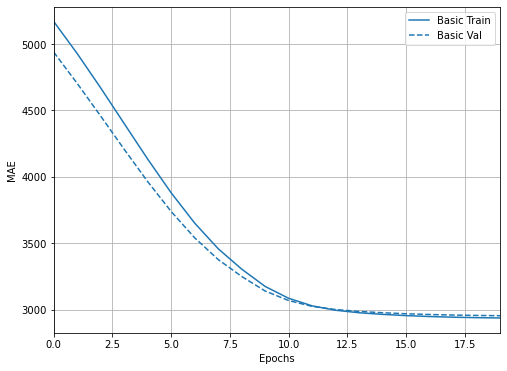

In [53]:
plt.figure(figsize=(8, 6))

plotter.plot({'Basic': training_hist}, metric = "mae")

plt.ylabel('MAE')

plt.show()

We can see how MAE decreases both on validation and training as epochs increases.

Now let's plot MSE evolution:

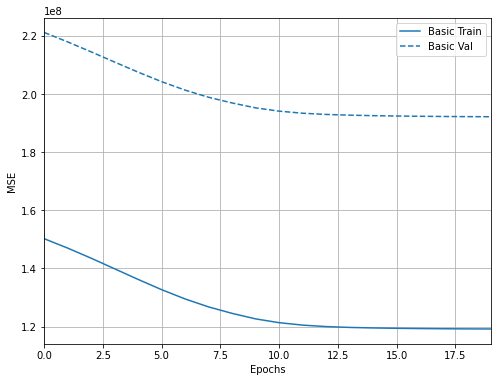

In [54]:
plt.figure(figsize=(8, 6))

plotter.plot({'Basic': training_hist}, metric = "mse")

plt.ylabel('MSE')

plt.show()

In [56]:
model_elu_64.evaluate(X_test, y_test)

376/376 [==============================] - 0s 1ms/step - loss: 795643776.0000 - mae: 3025.5229 - mse: 795643776.0000


[795643776.0, 3025.52294921875, 795643776.0]

So for NN approach we got a MAE of 3025, let's plot predicted versus actual values:

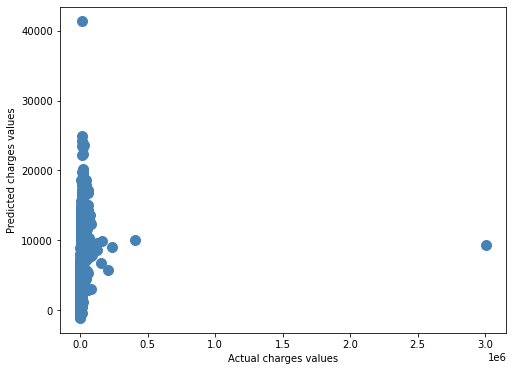

In [60]:
y_pred = model_elu_64.predict(X_test).flatten()

plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, s=100, c='steelblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')
plt.show()

We would expect to have a straight diagonal line 

In [58]:
print("R2 for NN", metrics.r2_score(y_test, y_pred))

R2 for NN 0.010613390035165371


In [59]:
print("MAE for NN", metrics.mean_absolute_error(y_test, y_pred))
print("MSE for NN",metrics.mean_squared_error(y_test, y_pred))

MAE for NN 3025.5237918060384
MSE for NN 795643896.0875808


#### We reached the lowest error for MAE with neural nets, so we'll proceede with this model for NA's imputation on **monthly_income**

Now let's use this models for predicting values on the dataframe with NA's

(array([2.753e+04, 5.310e+02, 5.390e+02, 3.820e+02, 4.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-1561.9146,  1444.9578,  4451.83  ,  7458.702 , 10465.574 ,
        13472.447 , 16479.32  , 19486.191 , 22493.064 , 25499.936 ,
        28506.809 ], dtype=float32),
 <a list of 10 Patch objects>)

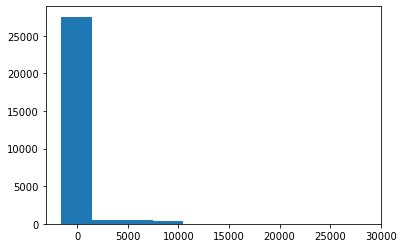

In [61]:
y_pred = model_elu_64.predict(nn_data_na.loc[:, nn_data_na.columns != 'monthly_income']).flatten()
plt.hist(y_pred)

The NN estimated some negative values which makes no sense, so set those values to 0

In [63]:
y_pred = np.where(y_pred < 0, 0, y_pred)

Impute values to the dataframe with NA's

In [64]:
nn_data_na['monthly_income'] = y_pred

In [149]:
nn_data_na.tail(n=5)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,debt_label,monthly_income
149976,-0.26636,-0.024279,1.610402,-0.353192,-0.682631,-0.186607,-0.906683,-0.196863,-0.668863,1.484861,0.0
149977,-0.26636,-0.023338,-1.586076,-0.353192,-1.072664,-0.186607,-0.906683,-0.196863,-0.668863,1.484861,0.0
149984,-0.26636,-0.024132,2.154483,-0.353192,-0.682631,-0.186607,-0.906683,-0.196863,-0.668863,0.782596,0.0
149992,-0.26636,-0.020802,-0.157863,-0.353192,0.487469,-0.186607,-0.022077,-0.196863,2.036672,2.187126,0.0
149997,-0.26636,-0.023300,0.386219,-0.353192,1.852585,-0.186607,-0.022077,-0.196863,-0.668863,2.187126,0.0


Let's reconstruct the dataframe with imputed values concatenating the predicted dataframe

In [66]:
df_scaled = pd.concat([nn_data_no_na, nn_data_na], axis=0)

df_scaled.reset_index(inplace=True, drop=True)

We'll inverse transform to get the original values

In [167]:
unscaled = standardScaler.inverse_transform(df_scaled.drop('monthly_income', axis = 1))

df_unscaled = pd.DataFrame(unscaled, columns = df_scaled.columns[:10])

df_final =  pd.concat([df_unscaled, df_scaled[['monthly_income']]], axis=1)

In [168]:
df_final.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,debt_label,monthly_income
0,1.0,0.766127,45.0,2.000000e+00,13.0,0.0,6.0,0.0,2.0,3.0,9120.0
1,0.0,0.957151,40.0,-2.775558e-17,4.0,0.0,0.0,0.0,1.0,2.0,2600.0
2,0.0,0.658180,38.0,1.000000e+00,2.0,1.0,0.0,0.0,0.0,2.0,3042.0
3,0.0,0.233810,30.0,-2.775558e-17,5.0,0.0,0.0,0.0,0.0,2.0,3300.0
4,0.0,0.907239,49.0,1.000000e+00,7.0,0.0,1.0,0.0,0.0,2.0,63588.0


Let's convert **number_of_time30-59_days_past_due_not_worse** to integer since there's a precision issue when converting  the values back...

In [170]:
df_final['number_of_time30-59_days_past_due_not_worse'] = df_final['number_of_time30-59_days_past_due_not_worse'].astype('int')

In [172]:
df_final.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,debt_label,monthly_income
0,1.0,0.766127,45.0,2,13.0,0.0,6.0,0.0,2.0,3.0,9120.0
1,0.0,0.957151,40.0,0,4.0,0.0,0.0,0.0,1.0,2.0,2600.0
2,0.0,0.658180,38.0,1,2.0,1.0,0.0,0.0,0.0,2.0,3042.0
3,0.0,0.233810,30.0,0,5.0,0.0,0.0,0.0,0.0,2.0,3300.0
4,0.0,0.907239,49.0,1,7.0,0.0,1.0,0.0,0.0,2.0,63588.0


# Final considerations and beyond

## Suggestions for Improving Data Quality and Models Accuracy
* Hyperparameters optimization
* Grid search more exhaustive
* One hot encoding for **debt_label** variable
* Create new features based on highly correlated variables **number_of_times_***
* Neural nets with more layers
* Assess unsupervised algorithms for missing values imputation

## Use Cases on Finance Domain

* Applying unsupervised algorithms such as K-means or DBSCAN can help to **detect similar groups** in the features space, after which you can give them differentiated treatment. This is very useful for risk analysis, marketing campaigns , customer personalization, etc
* Anomaly detection can help **detect rare or unexpected events** based on different approaches (univariate, multivariate, etc) such as fraud detection
* Predicting **expected debt_ratio** based on customers with similar behaviour can help anticipate borrowers debt to increase dramatically
